### Standard library imports

In [148]:
import sys
import os
import matplotlib.pyplot as plt
import numpy as np

### Custom library imports

In [223]:
sys.path.append(os.path.abspath('../src'))
import solvers as solvers
import utils as utils

import importlib
importlib.reload(solvers)
importlib.reload(utils)

<module 'utils' from '/Users/bensprenger/Documents/repo/model_predictive_control_for_opinion_dynamics/src/utils.py'>

### Define constants

In [224]:
np.random.seed(1)
nx = 5 # number of users
nu = 1 # number of control nodes
K = 10 # time horizon
T = 20

### Generate random dynamics

In [225]:
A,B,lambdas,x0 = utils.generate_random_dynamics(nx,nu,bias_low = 0,bias_high = 0.01,density = 0.5,control_influence = 1,stubborn_nodes = 1)
x0[2] = 0.01


B[0,0] = B[0,0] + A[0,2]
A[0,2] = 0
B[1,0] = B[1,0] + A[1,2]
A[1,2] = 0
B[4,0] = B[4,0] + A[4,2]
A[4,2] = 0

np.set_printoptions(precision=3,suppress = True)
print("A:\n",A)
print("B:\n",B)
print("lambdas:\n",lambdas)
print("x0:\n",x0)

A:
 [[0.268 0.113 0.    0.129 0.201]
 [0.379 0.289 0.    0.085 0.   ]
 [0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.475 0.   ]
 [0.    0.    0.    0.291 0.   ]]
B:
 [[0.289]
 [0.241]
 [0.   ]
 [0.519]
 [0.7  ]]
lambdas:
 [[0.    0.    0.    0.    0.   ]
 [0.    0.005 0.    0.    0.   ]
 [0.    0.    1.    0.    0.   ]
 [0.    0.    0.    0.005 0.   ]
 [0.    0.    0.    0.    0.009]]
x0:
 [0.7   0.102 0.01  0.694 0.414]


### Solve over horizon

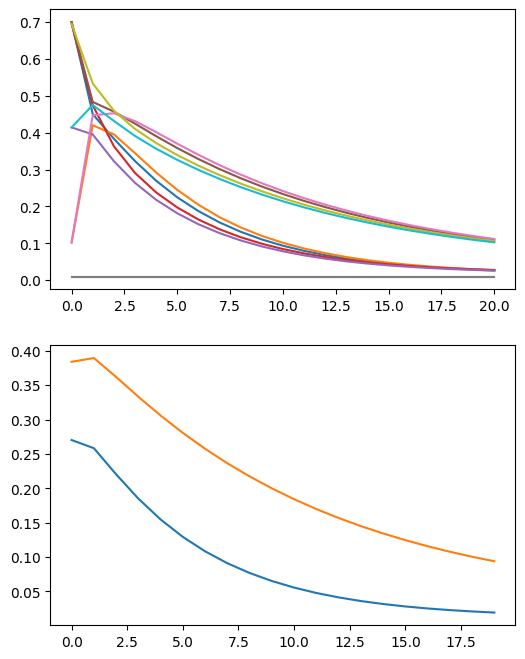

In [226]:
x,u,sum_cost = solvers.SolveRecedingHorizon(A,B,lambdas,x0,K,T)
x2,u2,sum_cost2 = solvers.SolveNaiveController(A,B,lambdas,x0,T)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 8))
ax1.plot(np.transpose(x))
ax1.plot(np.transpose(x2))
ax2.plot(np.transpose(u))
ax2.plot(np.transpose(u2))

In [227]:
print(sum_cost)
print(sum_cost2)

1.1021792312763998
1.5359237087275124


To do:
- [ ] Stubborn node that other nodes are not well-connected to
- [ ] Graph plotting
- [ ] Refactor utils to a class perhaps